# **Introduction**

Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and Karacaoren regions in Turkey. However, morphological measurements of 2500 pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques. Considering morphological features, all the data were modeled with four different machine learning methods: Logistic Regression (LR), Support Vector Machine (SVM) and Random Forest (RF), and k-Nearest Neighbor (k-NN), which further determined the most successful method for classifying pumpkin seed varieties.

This file is checked and bit modified version of https://www.kaggle.com/code/preciousosas/pumpkin-seed-classification
utilizing the Pumpkin seeds dataset https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/data

In [1]:
#import neccessary libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [2]:
seed = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
seed.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [3]:
#check the data information to know if there is any null value
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [4]:
seed.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [5]:
seed.iloc[:,-1]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

In [6]:
#check out the column names
seed.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [7]:
#set the x,y values
x = seed.drop('Class',axis=1)
y = seed['Class']

In [8]:
# So all 12 features in x
x.shape

(2500, 12)

In [9]:

from sklearn.decomposition import PCA
pca = PCA(n_components=5) # well, just picked some value for n_components, but you should try the effect with others and also with pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x)

# PCA centers the data but does not yet standard scale
x_pca_st = StandardScaler().fit(x_pca).transform(x_pca)

x_train,x_test,y_train,y_test = train_test_split(x_pca_st,y,test_size = 0.3,random_state=20)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)



(1750, 5) (1750,)
(750, 5) (750,)


In [36]:
import plotly.express as px
fig = px.scatter(x_pca, x=0, y=1, color=y)
fig.show()

In [11]:
#The support vector model
model = SVC()
#show the parameters the model needs
model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [12]:
svm_para = {'C':[0.1,1,10,100,1000],
             'gamma':['scale','auto'],
             'degree': [2,3,4,5,6,7],
             'kernel':['linear','poly','rbf'],
             }

Parameters C and gamma, for example, are the parameters that you set before for training. They are called *hyperparameters*.

After training, you get then the *parameters* for the model. That's the difference between parameters and hyperparameters words :)

It is good to note, however, that C and gamma are parameters for the Python function and in that respect it might be that sometimes they
are just called parameters.



In [13]:
x_train.shape

(1750, 5)

In [14]:
# GridSearch helps determine the hyperparameters that will give the model the highest accuracy
# Hyperparameters are the parameters that you set for training, like that C, or gamma above
# after training you get then the parameters(!) for the model. That's the difference
grid_svm = GridSearchCV(model,svm_para,cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_svm.fit(x_train,y_train)
#The best accuracy score
print('Best accuracy score :',grid_svm.best_score_)
#The best parameter
print('Best parameter :',grid_svm.best_params_)

Best accuracy score : 0.8868571428571428
Best parameter : {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [15]:
#Using the best parameter to build the best model
best_svm = SVC(C = 0.1, degree = 2,gamma = 'scale',kernel = 'linear')
best_svm.fit(x_train,y_train)
y_pred = best_svm.predict(x_test)
print(classification_report(y_test,y_pred))


               precision    recall  f1-score   support

   Çerçevelik       0.87      0.92      0.89       410
Ürgüp Sivrisi       0.90      0.83      0.86       340

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



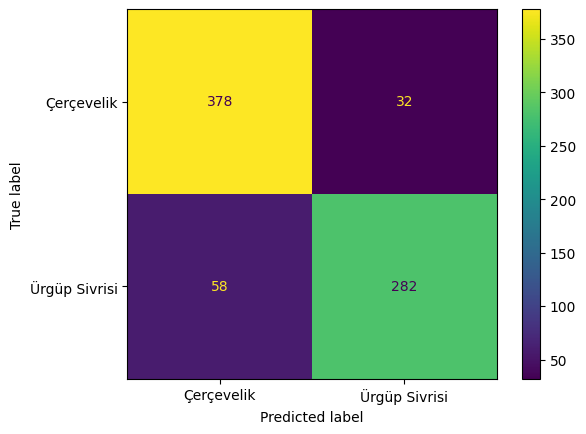

In [16]:
#To plot the confusion matrix
cm = confusion_matrix(y_test,y_pred)
dist = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = best_svm.classes_)
dist.plot()
plt.show()

# **Random Forest Classifier**


In [17]:
# Lets use Radom Forest model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [18]:
RFC_para = {'criterion':['gini','entropy'],
            'max_depth':[2,4,6,8,10],
            'bootstrap': [True,False]}

In [19]:
#Train the model
gridRFC = GridSearchCV(RFC,RFC_para,cv=7,scoring = 'accuracy', n_jobs = -1)
gridRFC.fit(x_train,y_train)
print(gridRFC.best_params_)
print(gridRFC.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10}
0.8897142857142858


In [20]:
# building the best model
best_RFC = RandomForestClassifier(bootstrap = True,criterion = 'entropy',max_depth = 8, n_jobs = -1)
best_RFC.fit(x_train,y_train)
y_pred1 = best_RFC.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred1))

               precision    recall  f1-score   support

   Çerçevelik       0.87      0.90      0.89       410
Ürgüp Sivrisi       0.87      0.84      0.86       340

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750



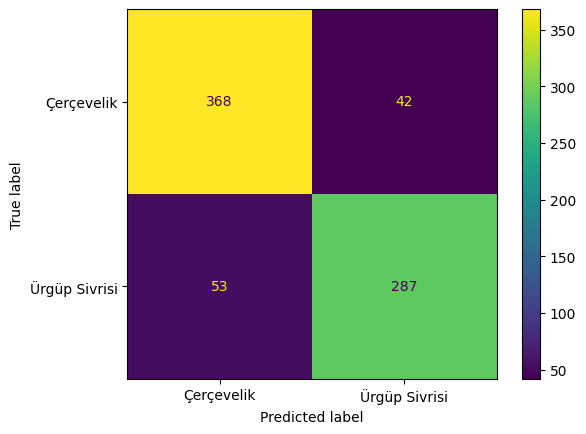

In [22]:
#To plot the confusion matrix
cm = confusion_matrix(y_test,y_pred1)
dist = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = best_RFC.classes_)
dist.plot()
plt.show()

## **Logistic Regression**

In [23]:
# Lets use Logistic Regression model
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [24]:
LogR_para= {'C': [0.05,0.02,0.01,0.1,0.5,1],
              'solver':['liblinear','saga'],
              'penalty': ['l1','l2']}

In [25]:
#Train the model
grid_LogR = GridSearchCV(LogR,LogR_para,cv=5,scoring='accuracy', n_jobs = -1)
grid_LogR.fit(x_train,y_train)
print(grid_LogR.best_params_)
print(grid_LogR.best_score_)

{'C': 0.05, 'penalty': 'l2', 'solver': 'saga'}
0.884


In [26]:
# building the best model
best_LogR = LogisticRegression(C = 1,penalty = 'l1',solver = 'liblinear')
best_LogR.fit(x_train,y_train)
y_pred2 = best_LogR.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred2))

               precision    recall  f1-score   support

   Çerçevelik       0.88      0.91      0.89       410
Ürgüp Sivrisi       0.89      0.84      0.86       340

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



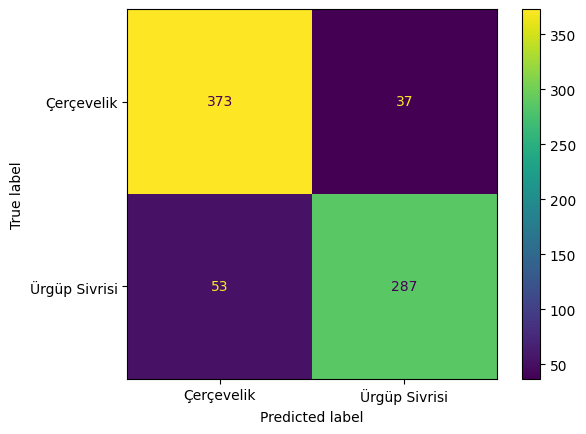

In [28]:
#To plot the confusion matrix
cmt = confusion_matrix(y_test,y_pred2)
dist = ConfusionMatrixDisplay(confusion_matrix = cmt,display_labels = best_LogR.classes_)
dist.plot()
plt.show()

## **KNN**

In [29]:
# Lets use K-Nearest Neighbour model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [30]:
knn_para = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
         'weights':['uniform','distance'],
         'metric':['euclidean','manhattan','minkowski']}

In [31]:
#Train the model
gridknn = GridSearchCV(knn,knn_para,cv=7,scoring='accuracy', n_jobs = -1)
gridknn.fit(x_train,y_train)
print(gridknn.best_params_)
print(gridknn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.8845714285714286


In [32]:
# building the best model
best_knn = KNeighborsClassifier(metric = 'manhattan',n_neighbors = 9,weights = 'uniform')
best_knn.fit(x_train,y_train)
# Predict
y_pred3 = best_knn.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred3))

               precision    recall  f1-score   support

   Çerçevelik       0.87      0.92      0.89       410
Ürgüp Sivrisi       0.89      0.84      0.86       340

     accuracy                           0.88       750
    macro avg       0.88      0.88      0.88       750
 weighted avg       0.88      0.88      0.88       750



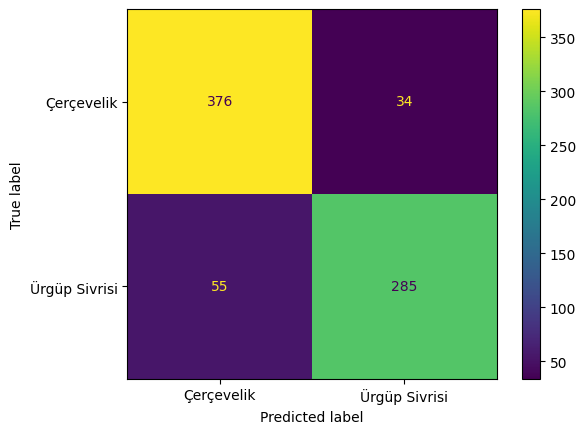

In [34]:
#To plot the confusion matrix
cmm = confusion_matrix(y_test,y_pred3)
dist = ConfusionMatrixDisplay(confusion_matrix = cmm,display_labels = best_knn.classes_)
dist.plot()
plt.show()